In [57]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('ggplot')
plt.style.use('dark_background')

In [58]:
df = pd.read_csv('ServerSideThroughputData.csv')

In [59]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,127.0.0.1,127.0.0.1,TCP,74,60668 > 8080 [SYN] Seq=0 Win=65495 Len=0 MSS...
1,3,0.000014,127.0.0.1,127.0.0.1,TCP,66,60668 > 8080 [ACK] Seq=1 Ack=1 Win=65536 Len...
2,4,0.000041,127.0.0.1,127.0.0.1,TCP,70,"60668 > 8080 [PSH, ACK] Seq=1 Ack=1 Win=6553..."
3,6,0.000048,127.0.0.1,127.0.0.1,TCP,68,"60668 > 8080 [PSH, ACK] Seq=5 Ack=1 Win=6553..."
4,9,0.002414,127.0.0.1,127.0.0.1,TCP,66,60668 > 8080 [ACK] Seq=7 Ack=13 Win=65536 Le...


In [60]:
df.size

4599

In [61]:
df.drop(['No.', 'Source', 'Destination', 'Protocol', 'Info'], axis=1, inplace=True)

In [62]:
df.head()

,Time,Length
0,0.000000,74
1,0.000014,66
2,0.000041,70
3,0.000048,68
4,0.002414,66


In [63]:
df.shape

(657, 2)

In [64]:
df.iloc[600]

Time      110.894089
Length     66.000000
Name: 600, dtype: float64

In [65]:
curr = 0
last = 0
currTime = 0
currThroughput = 0
time = []
throughPut = []
for i, j in df.iterrows():
    if curr - last > 2:
        time.append(currTime)
        throughPut.append(currThroughput/(curr-last))
        last = curr
        currTime += 2
        currThroughput = 0
    currThroughput += j['Length']
    curr = j['Time']
# time.append(currTime)
# throughPut.append(currThroughput/(curr-last))

In [66]:
len(time)

60

In [67]:
print(time)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118]


In [68]:
len(throughPut)

60

In [69]:
print(throughPut)

[271.286259199727, 377.9408025788384, 377.2904826773228, 375.0239167067643, 375.8685122960452, 377.7779206262607, 345.4297845505676, 376.6723913264106, 377.67581241087134, 377.6430356469294, 377.5425888430487, 378.0036829559472, 377.2262798303463, 376.9137073466475, 377.36484887323013, 377.4809320417908, 377.60255421522095, 376.75842545176243, 377.9801576698678, 378.2348520813558, 376.2030919884951, 377.24548546634367, 377.38726492977565, 377.1526230041624, 378.4048692995366, 377.84310289474945, 377.6084032348845, 377.5579242384282, 377.49651148206516, 375.1939442084221, 377.15268356539224, 375.8704725497707, 376.72580715974414, 377.51381138991684, 344.3261433012593, 378.262386582596, 377.8677466372492, 376.9899480044244, 378.1069307973773, 344.6046486278554, 378.0785043458415, 377.6613395098038, 377.203572339692, 376.85656766238384, 375.6909492199645, 378.2789450096275, 378.00378415962155, 377.9364455626883, 378.23851344108857, 377.85361210950595, 378.16175909794606, 378.8010243735413

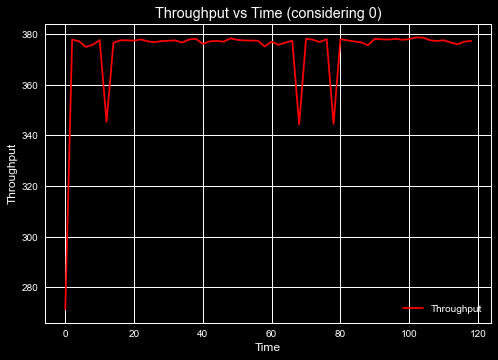

In [70]:
plt.plot(time, throughPut, 'r', label='Throughput')
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.title('Throughput vs Time (considering 0)')
plt.legend()
plt.savefig('Throughput vs Time (considering 0).png')
plt.show()

In [71]:
time = time[1:]
throughPut = throughPut[1:]

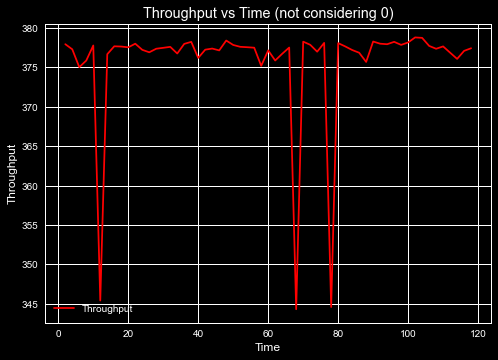

In [72]:
plt.plot(time, throughPut, 'r', label='Throughput')
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.title('Throughput vs Time (not considering 0)')
plt.legend()
plt.savefig('Throughput vs Time (not considering 0).png')
plt.show()